<b>Method1

In [36]:
# Import libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
import warnings
warnings.filterwarnings('ignore')

In [37]:
# Import dataset.
df = pd.read_csv('/Users/harshini/Desktop/Thinkful/Data/Capstone3/Admission_Predict.csv')
#df = df.sort_values(by='GRE Score')

In [38]:
# Create feature
X = df.iloc[:,1:8]
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [39]:
# Find optimal cluster number by Elbow method.
wcms = []
for i in range(1,11):
    model = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    model.fit(X)
    wcms.append(model.inertia_)

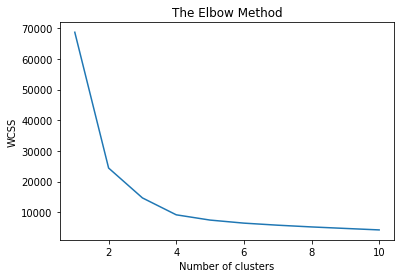

In [40]:
plt.plot(range(1,11),wcms)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

From the above, 4 is the optimal cluster number.

In [41]:
km = KMeans(n_clusters=4,init='k-means++',max_iter=300,n_init=10,random_state=0)
pred = km.fit_predict(X)
X['Clusters'] = pred

<function matplotlib.pyplot.show(*args, **kw)>

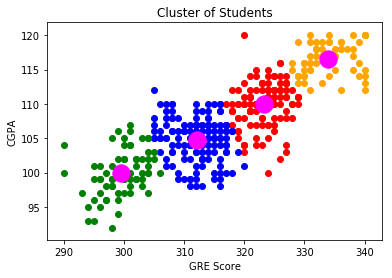

In [42]:
plt.scatter(X.loc[X['Clusters']==0,'GRE Score'],X.loc[X['Clusters']==0,'TOEFL Score'],c='r')
plt.scatter(X.loc[X['Clusters']==1,'GRE Score'],X.loc[X['Clusters']==1,'TOEFL Score'],c='b')
plt.scatter(X.loc[X['Clusters']==2,'GRE Score'],X.loc[X['Clusters']==2,'TOEFL Score'],c='g')
plt.scatter(X.loc[X['Clusters']==3,'GRE Score'],X.loc[X['Clusters']==3,'TOEFL Score'],c='orange')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=300,c='magenta',label='Centroids')

plt.title('Cluster of Students')
plt.xlabel('GRE Score')
plt.ylabel('CGPA')
plt.show

<b>Method2

In [43]:
df.head()
df.columns = df.columns.str.strip()

In [44]:
X1 = df.iloc[:,1:8]
df.loc[df['Chance of Admit']>0.50,'Chance of Admit'] = 1
df.loc[df['Chance of Admit']<=0.50,'Chance of Admit'] = 0
y = df.iloc[:,-1]
X1.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [45]:
X_norm = normalize(X1)

In [46]:
X_pca = PCA(2).fit_transform(X_norm)
y_pred = KMeans(n_clusters=2, random_state=42).fit_predict(X_pca)

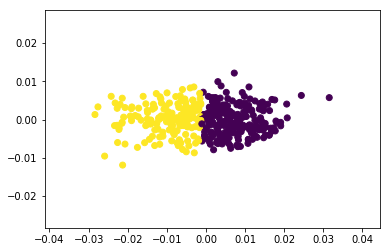

In [47]:
plt.scatter(X_pca[:, 0], X_pca[:, 1],c=y_pred)
plt.show()

In [48]:
# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y))

Comparing k-means clusters against the data:
Chance of Admit  0.0  1.0
row_0                    
0                  4  226
1                 31  139
